In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [9]:
df = pd.read_csv("oddsData.csv")
df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal
0,2007-10-30,2008,Utah,@,Golden State,117,96,100.0,-120.0,212.0,1.0,105.5
1,2007-10-30,2008,LA Lakers,vs,Houston,93,95,190.0,-230.0,199.0,5.0,99.0
2,2007-10-30,2008,Houston,@,LA Lakers,95,93,-230.0,190.0,199.0,-5.0,99.0
3,2007-10-30,2008,San Antonio,vs,Portland,106,97,-1400.0,900.0,189.5,-13.0,95.0
4,2007-10-30,2008,Portland,@,San Antonio,97,106,900.0,-1400.0,189.5,13.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,@,New York,123,121,100.0,-120.0,218.5,1.5,106.5
37100,2023-01-16,2023,Memphis,vs,Phoenix,136,106,-800.0,550.0,231.0,-12.5,118.0
37101,2023-01-16,2023,New York,vs,Toronto,121,123,-120.0,100.0,218.5,-1.5,106.5
37102,2023-01-16,2023,Minnesota,vs,Utah,125,126,-175.0,155.0,232.0,-4.0,119.0


In [10]:
df.shape

(37104, 12)

In [11]:
df.dtypes

date                  object
season                 int64
team                  object
home/visitor          object
opponent              object
score                  int64
opponentScore          int64
moneyLine            float64
opponentMoneyLine    float64
total                float64
spread               float64
secondHalfTotal      float64
dtype: object

In [12]:
for column_name in df.columns:
    column = df[column_name]
    print(column_name, "unique values:", column.unique(), "\n")

date unique values: ['2007-10-30' '2007-10-31' '2007-11-01' ... '2023-01-14' '2023-01-15'
 '2023-01-16'] 

season unique values: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023] 

team unique values: ['Utah' 'LA Lakers' 'Houston' 'San Antonio' 'Portland' 'Golden State'
 'New Jersey' 'Dallas' 'Cleveland' 'Seattle' 'Washington' 'Orlando'
 'Chicago' 'Sacramento' 'Milwaukee' 'Toronto' 'New Orleans' 'Memphis'
 'Denver' 'Philadelphia' 'Indiana' 'Miami' 'Detroit' 'Phoenix' 'New York'
 'Atlanta' 'Minnesota' 'LA Clippers' 'Charlotte' 'Boston' 'Oklahoma City'
 'Brooklyn'] 

home/visitor unique values: ['@' 'vs'] 

opponent unique values: ['Golden State' 'Houston' 'LA Lakers' 'Portland' 'San Antonio' 'Utah'
 'Chicago' 'Cleveland' 'Dallas' 'Denver' 'Indiana' 'Memphis' 'Milwaukee'
 'New Jersey' 'New Orleans' 'Orlando' 'Philadelphia' 'Sacramento'
 'Seattle' 'Toronto' 'Washington' 'Detroit' 'Miami' 'Phoenix' 'Atlanta'
 'Boston' 'Charlotte' 'LA Clippers' 'Minnesota' '

37,104 observations, 12 features

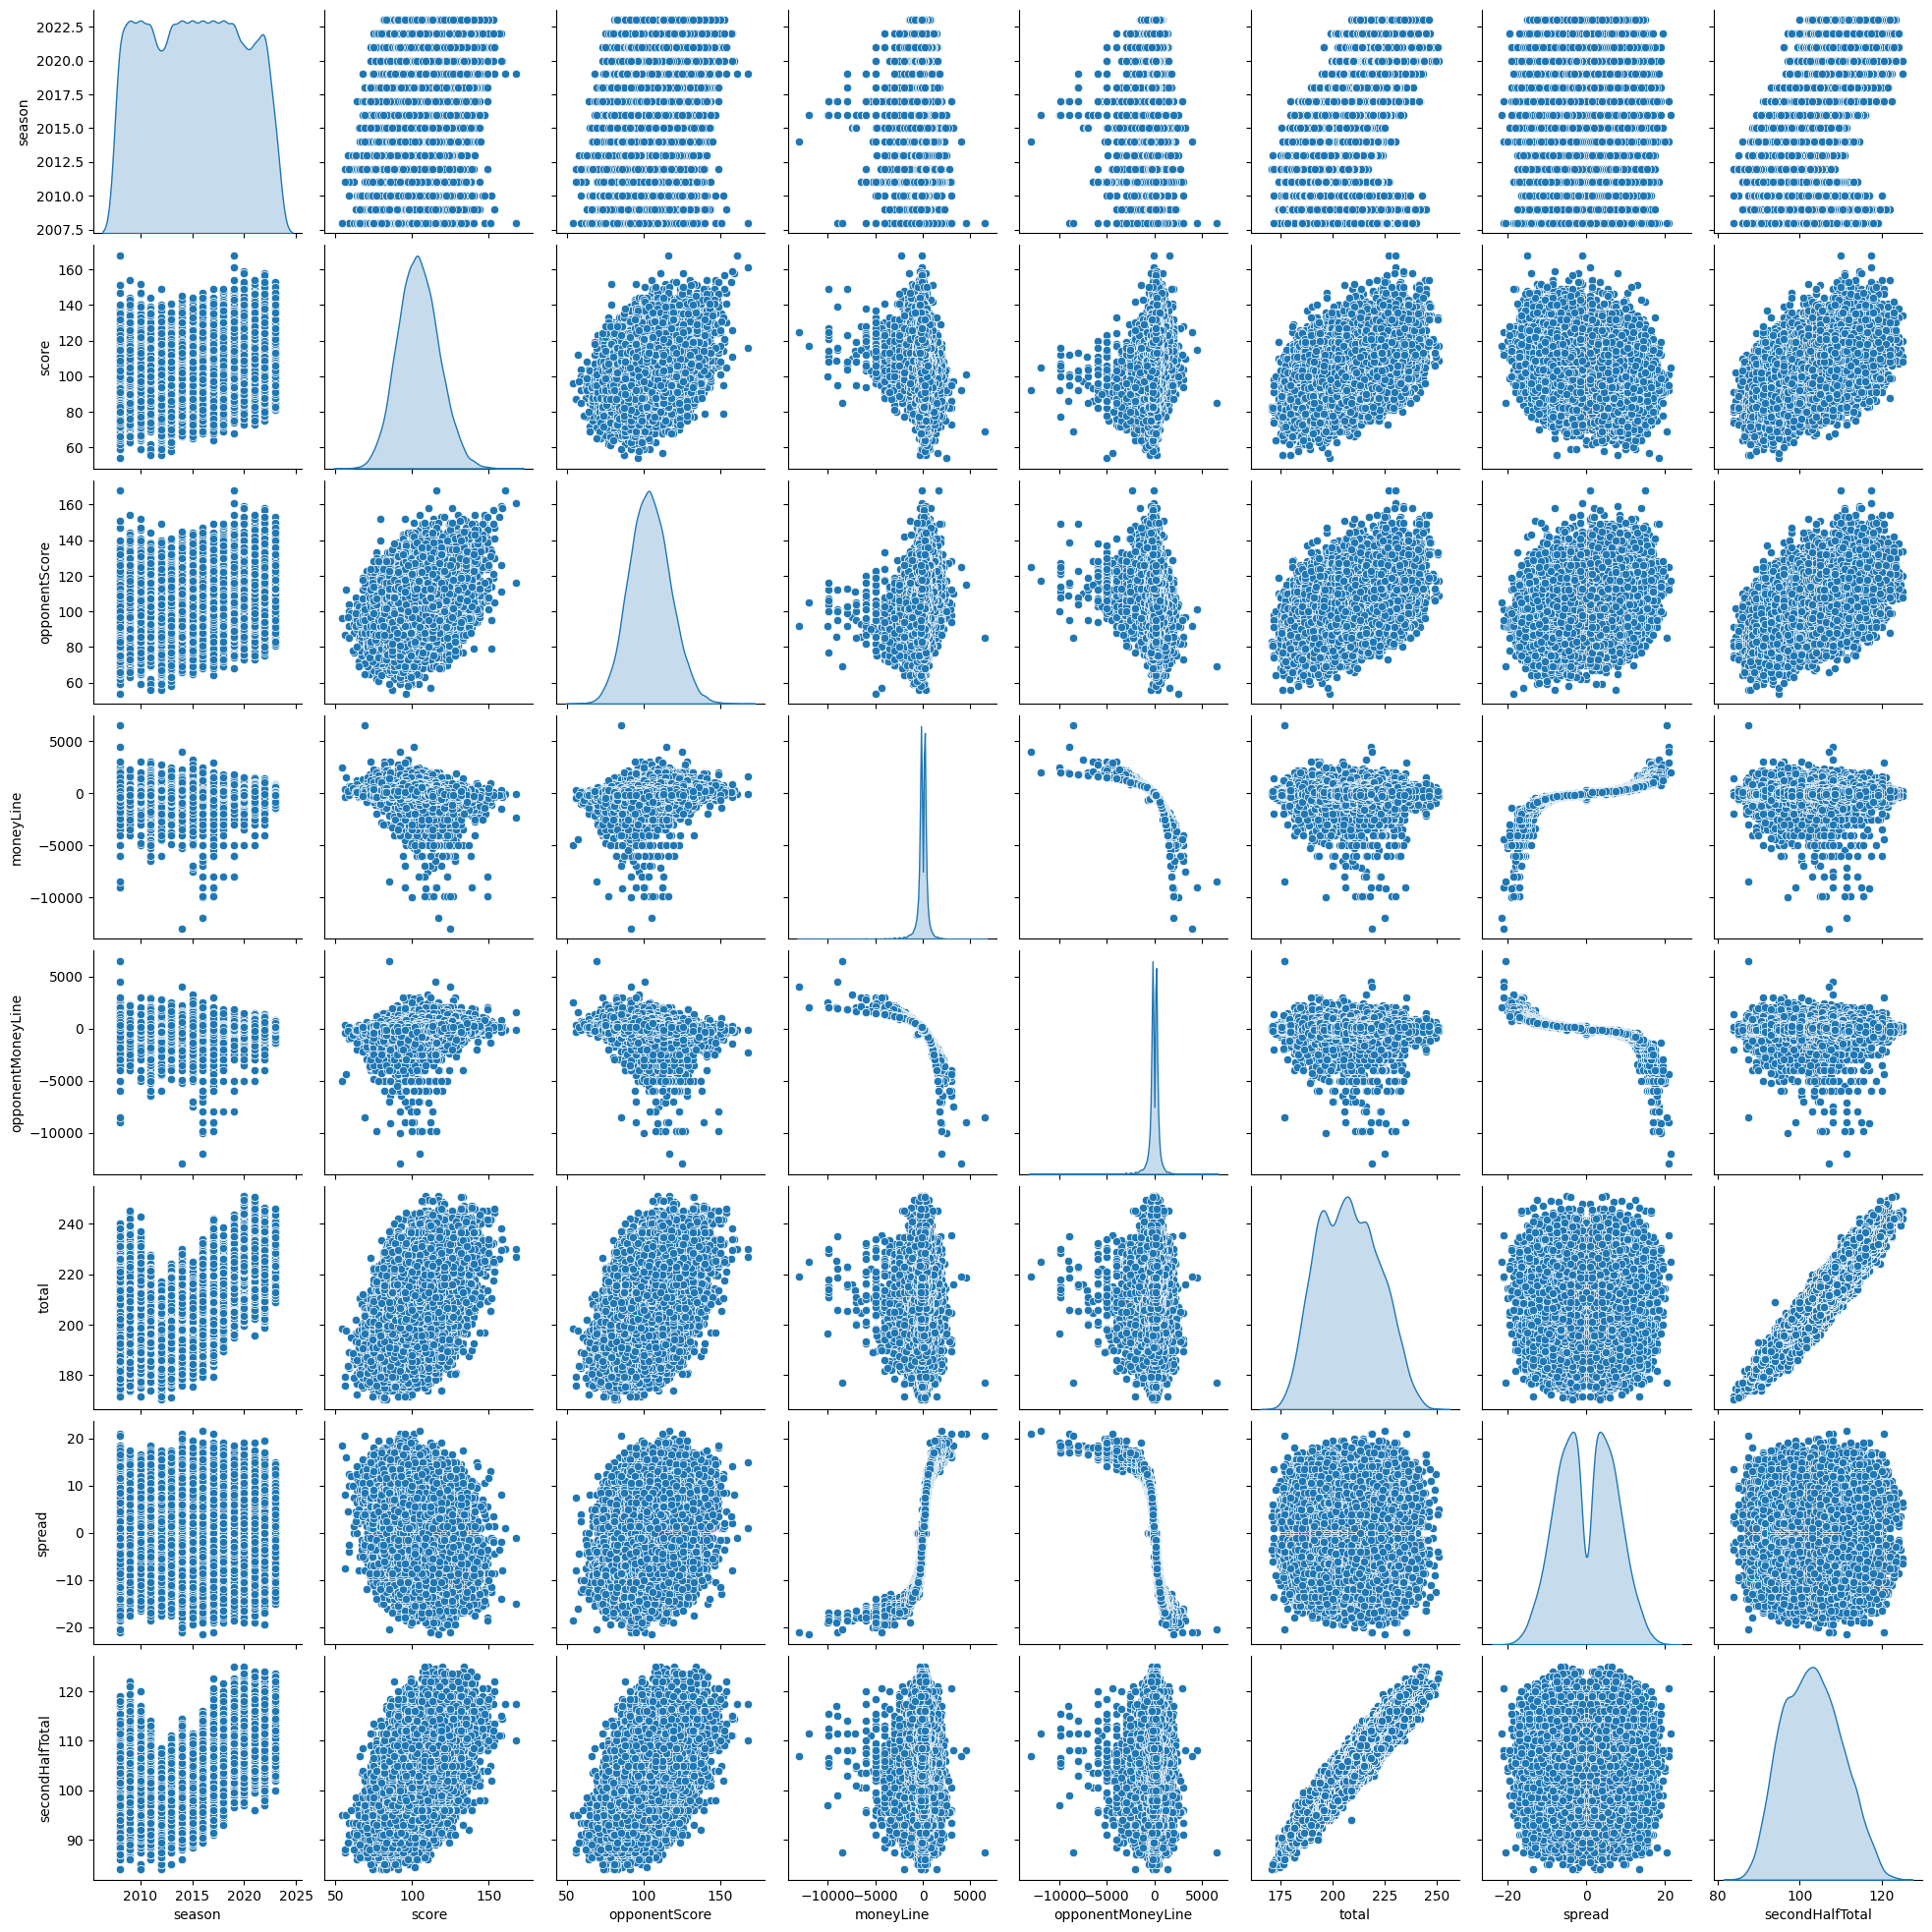

In [13]:
df = pd.read_csv("oddsData.csv")
pairplot = sns.pairplot(df, diag_kind='kde')
plt.savefig("pairplot.png")

In [14]:
print(df.describe().round(2))

         season     score  opponentScore  moneyLine  opponentMoneyLine  \
count  37104.00  37104.00       37104.00   37104.00           37104.00   
mean    2015.23    104.03         104.03     -66.17             -66.17   
std        4.49     13.30          13.30     605.35             605.35   
min     2008.00     54.00          54.00  -13000.00          -13000.00   
25%     2011.00     95.00          95.00    -240.00            -240.00   
50%     2015.00    104.00         104.00    -110.00            -110.00   
75%     2019.00    113.00         113.00     195.00             195.00   
max     2023.00    168.00         168.00    6500.00            6500.00   

          total    spread  secondHalfTotal  
count  37104.00  37104.00         37104.00  
mean     207.66      0.00           103.13  
std       14.28      7.12             7.03  
min      170.50    -21.50            84.00  
25%      196.00     -5.50            97.50  
50%      207.00      0.00           103.00  
75%      218.50   

In [15]:
print(df["moneyLine"].quantile([0.05, 0.95]))

0.05   -800.0
0.95    575.0
Name: moneyLine, dtype: float64


/var/folders/zk/684rggrn76sf_fhg61wgw21r0000gn/T/ipykernel_58795/448372433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


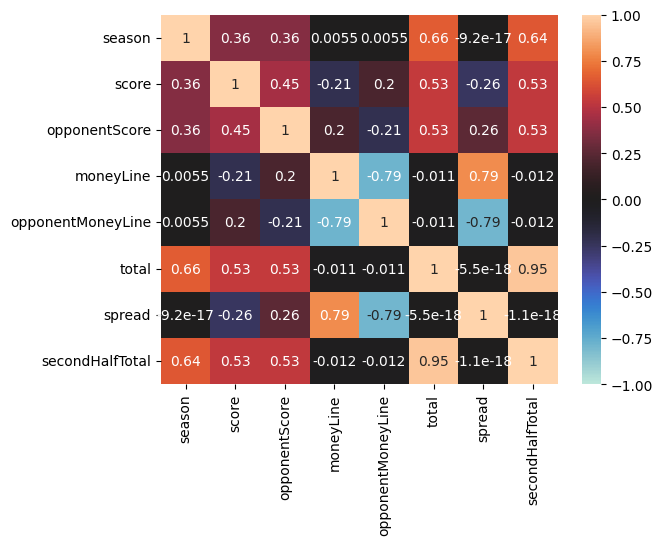

In [16]:
corr = df.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot = True)
plt.savefig("heatmap.png")